# To Explore Supervised Machine Learning

In [1]:
import numpy as np
import pandas as pd


## Importing the file

In [2]:
df1=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df1.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Plot for Hours and Scores

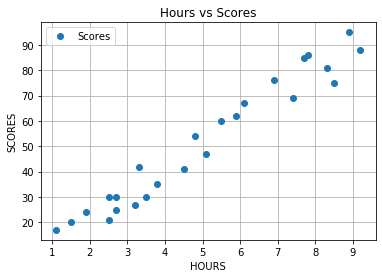

In [3]:
import matplotlib.pyplot as plt  
%matplotlib inline
df1.plot(x="Hours",y="Scores",style="o")
plt.title("Hours vs Scores")
plt.xlabel("HOURS")
plt.grid(True)
plt.ylabel("SCORES")
plt.show()

## Training the model

In [4]:
msk = np.random.rand(len(df1)) < 0.8
train = df1[msk]
test = df1[~msk]

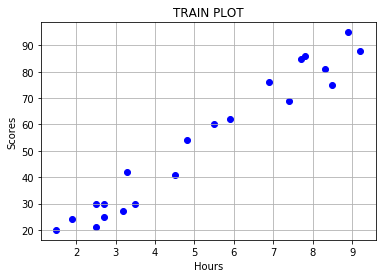

In [5]:
plt.scatter(train.Hours, train.Scores,  color='blue')
plt.xlabel("Hours")
plt.title("TRAIN PLOT")
plt.grid(True)
plt.ylabel("Scores")
plt.show()

## Finding coefficients and intercept

In [6]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Hours']])
train_y = np.asanyarray(train[['Scores']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[9.80568791]]
Intercept:  [2.39137525]


## Plot with the regression line

95.54541039167303


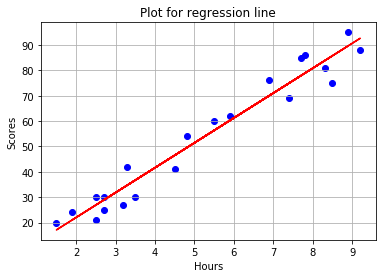

In [7]:
plt.scatter(train.Hours, train.Scores,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Plot for regression line")
plt.grid(True)
print(regr.coef_[0][0]*9.5 + regr.intercept_[0])

## Predicting the score when hours given is equal to 9.25 

In [8]:
print("score:",regr.predict([[9.25]]))

score: [[93.09398841]]


##  Finding the errors

In [24]:
X = df1.iloc[:, :-1].values  
y = df1.iloc[:, 1].values  

In [30]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 
y_pred = regr.predict(X_test)

In [31]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Squareed error:', metrics.mean_squared_error(y_test, y_pred))
print("R2-score:",r2_score(y_test , y_pred) )

Mean Absolute Error: 4.0945212569840335
Squareed error: 20.467411896152804
R2-score: 0.9483459219257198
